## Extracting features from images 
### 1. Extracting features from pixel intensities
First look at the pixel intensity for a pixel image of the number 0

In [4]:
from sklearn import datasets
digits = datasets.load_digits()

print (digits.target[0])
print(digits.images[0])
print('Feature vector:\n', digits.images[0].reshape(-1, 64))

0
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
Feature vector:
 [[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]]


####  As we can see from the result, the vector space is not sparse, and for a tiny image a vector with size length*width is in need. 
So modern computer vision applications frequently use 
    1. hand-engineered feature extraction methods
        - applicable to many different problems
    2. unsupervised learning

### 2. Extracting points of interest as features
- extract important points like edges and corners

In [25]:
import numpy as np
from skimage.feature import corner_harris, corner_peaks
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage.exposure import equalize_hist

In [69]:
def show(corners, image):
    fig = plt.figure()
    plt.gray()
    plt.imshow(image)
    y_corner, x_corner = zip(*corners)
    plt.plot(x_corner, y_corner, "or")
    plt.xlim(1, image.shape[1])
    plt.ylim(image.shape[0], 0)
    fig.set_size_inches(np.array(fig.get_size_inches()) * 1.5)
    plt.show()

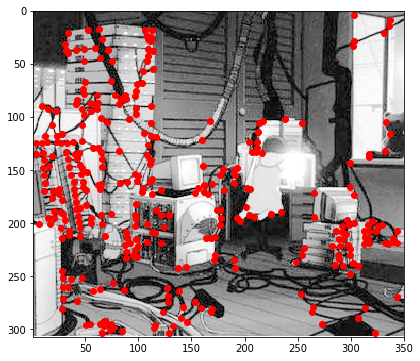

In [70]:
from skimage import io
lain = io.imread('pic/lain.jpg')
lain = equalize_hist(rgb2gray(lain))
corners = corner_peaks(corner_harris(lain), min_distance=2)
show(corners, lain)

#### Plot edges

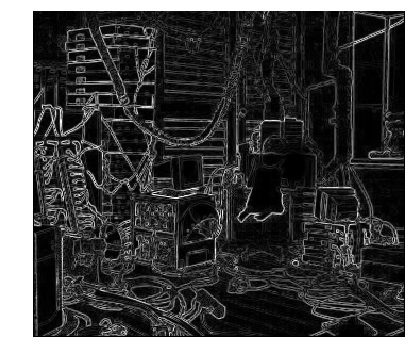

In [72]:
from skimage.filters import roberts, scharr, prewitt
edge_roberts = roberts(lain)
fig, ax = plt.subplots()
fig.set_size_inches(np.array(fig.get_size_inches()) * 1.5)
ax.imshow(edge_roberts, cmap=plt.cm.gray)
ax.axis("off")
plt.show()

#### Other edge methods documented in skimage

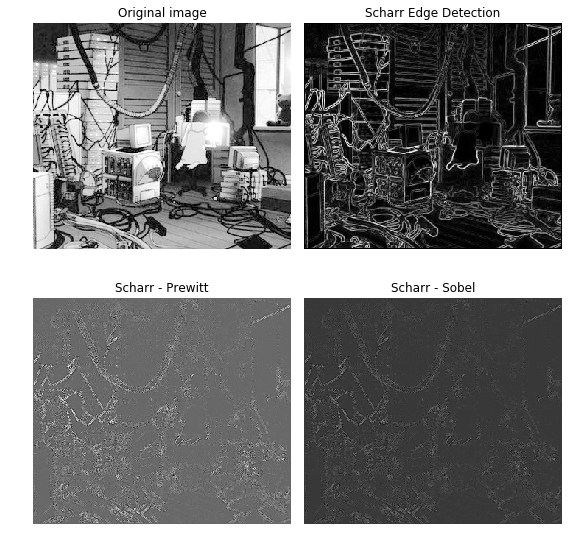

In [75]:
x, y = np.ogrid[:100, :100]
# Rotation-invariant image with different spatial frequencies

edge_sobel = sobel(lain)
edge_scharr = scharr(lain)
edge_prewitt = prewitt(lain)

diff_scharr_prewitt = edge_scharr - edge_prewitt
diff_scharr_sobel = edge_scharr - edge_sobel
max_diff = np.max(np.maximum(diff_scharr_prewitt, diff_scharr_sobel))

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True,
                         figsize=(8, 8))
ax = axes.ravel()

ax[0].imshow(lain, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(edge_scharr, cmap=plt.cm.gray)
ax[1].set_title('Scharr Edge Detection')

ax[2].imshow(diff_scharr_prewitt, cmap=plt.cm.gray, vmax=max_diff)
ax[2].set_title('Scharr - Prewitt')

ax[3].imshow(diff_scharr_sobel, cmap=plt.cm.gray, vmax=max_diff)
ax[3].set_title('Scharr - Sobel')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

### 3. SIFT and SURF
#### Scale-Invariant Feature Transform
- for extracting features from images which are not that sensitive to the scale, rotation, and illumination of the image
- Each SIFT feature, or descriptor, is a vector that describes edges and corners in a region of an image
- SIFT also captures information about the composition of each point of interest and its surroundings

#### Speeded-Up Robust Features
- can be
computed more quickly than SIFT
- more effective at recognizing features
across images that have been transformed in certain ways.

#### Will explore more in Clusternig with k-Means

In [79]:
import mahotas as mh
from mahotas.features import surf
image = mh.imread('pic/lain.jpg', as_grey=True)
print ('The first SURF descriptor:\n', surf.surf(image)[0])
print ('Extracted %s SURF descriptors' % len(surf.surf(image)))

The first SURF descriptor:
 [ 1.12330560e+02  2.21461910e+02  4.44210188e+00  8.78281774e+02
 -1.00000000e+00 -2.98449871e+00  6.46694673e-03 -2.91345402e-04
  6.46694673e-03  6.81840313e-04  5.87334879e-02  3.55529144e-02
  5.87334879e-02  3.55529144e-02  3.45221638e-02  3.10793835e-02
  3.45221638e-02  3.11741025e-02  4.73784247e-03  6.48078642e-03
  4.83552425e-03  6.52544595e-03  1.94199349e-02 -1.43539486e-03
  2.00607396e-02  2.05478379e-02  9.49408765e-02  1.77119546e-01
  1.88345256e-01  1.83529087e-01  1.52718554e-01  1.69006003e-01
  2.41969002e-01  2.95096574e-01  5.45767884e-02  2.43584360e-02
  5.45767884e-02  3.30989487e-02  3.33280831e-02 -2.93439342e-03
  3.33280831e-02  1.40448337e-02  3.89759021e-01  7.45335311e-02
  3.89759021e-01  1.34321020e-01  3.38195272e-01  2.21490354e-01
  3.38221561e-01  2.42493942e-01  2.57906556e-02  1.99758915e-02
  2.61063556e-02  1.99985458e-02  1.70854746e-03  8.39415796e-04
  1.70854746e-03  9.98258442e-04  9.29786680e-03  8.74547663e-